<a href="https://colab.research.google.com/github/franc90366/Proyecto-A.-Grover/blob/main/GROVER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PASO 1
# Trabajar en Google Colab

# Instalar Cirq e importar librerias necesarias
!pip install cirq


import cirq
import matplotlib.pyplot as plt
from IPython.display import display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
# PASO 2

# Se define el oráculo marcando el estado |110> (la guitarra dañada) con una puerta CZ controlada
def oracle(qubits):
    circuit = cirq.Circuit()
    circuit.append(cirq.CZ(qubits[1], qubits[2]))
    return circuit

# Definir el difusor (operador difusor)
def diffuser(qubits):
    circuit = cirq.Circuit()
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H(qubits[2]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2])) # Puerta Toffoli (CCX)
    circuit.append(cirq.H(qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    return circuit

# Dibujar el circuito de Grover con un número de intentos controlado
def grover_circuit(num_attempts=1):
    qubits = [cirq.LineQubit(i) for i in range(3)]  # Definimos 3 qubits (simulando guitarras)
    circuit = cirq.Circuit()

# Aplicar puertas Hadamard a todos los qubits
    circuit.append(cirq.H.on_each(*qubits))

# Repetir el ciclo de Grover el número de veces especificado
    for _ in range(num_attempts):
        # Aplicar el oráculo
        circuit += oracle(qubits)

# Aplicar el difusor
        circuit += diffuser(qubits)

# Medir los qubits
    circuit.append(cirq.measure(*qubits, key='result'))

    return circuit

Algoritmo de Grover con 5 ciclos:
0: ───H───────H───X───────@───X───H───────────H───X───────@───X───H───────────H───X───────@───X───H───────────H───X───────@───X───H───────────H───X───────@───X───H───────M('result')───
                          │                               │                               │                               │                               │               │
1: ───H───@───H───X───────@───X───H───────@───H───X───────@───X───H───────@───H───X───────@───X───H───────@───H───X───────@───X───H───────@───H───X───────@───X───H───────M─────────────
          │               │               │               │               │               │               │               │               │               │               │
2: ───H───@───H───X───H───X───H───X───H───@───H───X───H───X───H───X───H───@───H───X───H───X───H───X───H───@───H───X───H───X───H───X───H───@───H───X───H───X───H───X───H───M─────────────


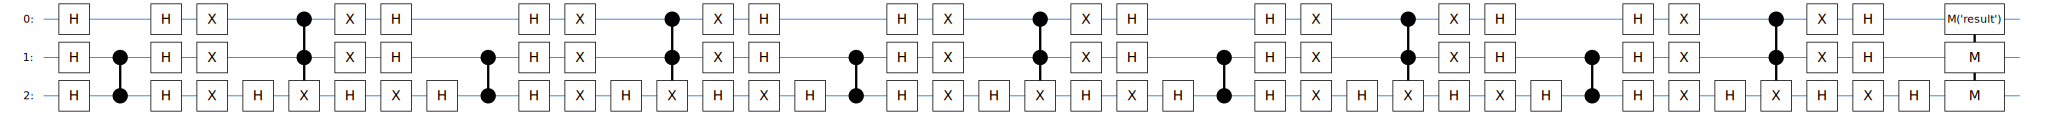

Resultados de las mediciones:
Counter({3: 29, 5: 29, 7: 29, 4: 27, 6: 27, 0: 24, 1: 20, 2: 15})


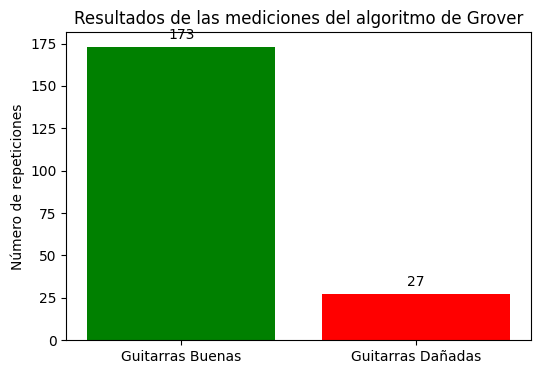

In [3]:
# PASO 3

# Configuración de número de difusores (algoritmo)
num_attempts = 5  # Ingresar número de difusores
circuit = grover_circuit(num_attempts)

# Mostrar el circuito
print(f"Algoritmo de Grover con {num_attempts} ciclos:")
print(circuit)

# Visualización del circuito en Google Colab
from cirq.contrib.svg import SVGCircuit
display(SVGCircuit(circuit))

# Ejecutar el circuito en un simulador cuántico
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=200)  # Ejecutar intentos

# Mostrar los resultados de las mediciones
print("Resultados de las mediciones:")
print(result.histogram(key='result'))

# Contamos cuántas veces encontramos el estado |000> (guitarra buena) y el estado |110> (guitarra dañada)
measurement_counts = result.histogram(key='result')

# Estado de guitarras buenas |000> (en formato binario)(difusor agrupa todos los estados menos el 110)
good_guitar_state = 0b000
# Estado de guitarra dañada |110> (en formato binario)
damaged_guitar_state = 0b110

# Contamos cuántas veces encontramos cada uno de los estados
good_guitar_count = sum(count for state, count in measurement_counts.items() if state != damaged_guitar_state)
damaged_guitar_count = measurement_counts.get(damaged_guitar_state, 0)

# Crear el gráfico de barras
labels = ['Guitarras Buenas', 'Guitarras Dañadas']
values = [good_guitar_count, damaged_guitar_count]

# Graficar
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['green', 'red'])
plt.title(f"Resultados de las mediciones del algoritmo de Grover")
plt.ylabel("Número de repeticiones")

# Añadir los números sobre las barras
for i, v in enumerate(values):
    plt.text(i, v + 5, str(v), ha='center')

plt.show()